In [1]:
import pandas as pd
import numpy as np

In [2]:
dfc = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
dfd = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
dfr = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [13]:
dfc.shape

(266, 109)

In [4]:
colonial_countries = dfc.loc[dfc['Province/State'].notnull()]['Country/Region'].unique().tolist()

# Fixing the Colonial Countries

In [5]:
colonial_countries

['Australia',
 'Canada',
 'China',
 'Denmark',
 'France',
 'Netherlands',
 'United Kingdom']

In [3]:
coord_dct = [{"Country":"Australia","Lat":-29.840644,"Long":131.814028},
            {"Country":"Canada","Lat":54.444492,"Long":-120.933500},
            {"Country":"China","Lat":35.8617,"Long":104.1954},
            {"Country":"Denmark","Lat":56.121060,"Long":8.988298},
            {"Country":"France","Lat":46.2276,"Long":2.2137},
            {"Country":"Netherlands","Lat":52.254709,"Long":5.656206},
            {"Country":"United Kingdom","Lat":53.330873,"Long":-1.642633}]

In [4]:
coord_df = pd.DataFrame(coord_dct).set_index('Country')

In [6]:
lat_long_df = dfc[["Country/Region","Lat","Long"]].set_index('Country/Region')

In [5]:
lat_long_df = dfc[["Country/Region","Lat","Long"]].groupby(["Country/Region"]).agg({"Lat":"first","Long":"first"})

In [6]:
lat_long_df

,Lat,Long
Country/Region,,
Afghanistan,33.000000,65.000000
Albania,41.153300,20.168300
Algeria,28.033900,1.659600
Andorra,42.506300,1.521800
Angola,-11.202700,17.873900
...,...,...
West Bank and Gaza,31.952200,35.233200
Western Sahara,24.215500,-12.885800
Yemen,15.552727,48.516388


In [7]:
coord_df_join =  lat_long_df.join(coord_df, rsuffix = 'c')

In [11]:
coord_df_join['Latm'] = [coord_df_join.iloc[i,0] if coord_df_join.iloc[i,2] != None else coord_df_join.iloc[i,2] for i in range(len(coord_df_join))]
coord_df_join['Longm'] = [coord_df_join.iloc[i,1] if coord_df_join.iloc[i,3] != np.nan else coord_df_join.iloc[i,3] for i in range(len(coord_df_join))]

In [13]:
coord_df_join.loc['France'], coord_df_join.loc['India']

(Lat       3.9339
 Long    -53.1258
 Latc     46.2276
 Longc     2.2137
 Latm      3.9339
 Longm   -53.1258
 Name: France, dtype: float64,
 Lat      21.0
 Long     78.0
 Latc      NaN
 Longc     NaN
 Latm     21.0
 Longm    78.0
 Name: India, dtype: float64)

In [24]:
coord_df_join = coord_df_join[['Latm','Longm']]

In [25]:
coord_df_join.loc['China']

Latm      31.8257
Longm    117.2264
Name: China, dtype: float64

# Forecasting

## 1) Data Transformation

In [17]:
dfc.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,726,736,750,766,773,782,789,795,803,820
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,738,743,743,743,745,745,747,748,750,751
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,26,27,27,27,27,30,35,35,35,36


In [65]:
dfc_world = dfc[date_cols].agg(sum)
dfd_world = dfd[date_cols].agg(sum)
dfr_world = dfr[date_cols].agg(sum) 

In [301]:
dfd_grp = dfd[cols].groupby(["Country/Region"], as_index=False).agg(sum).set_index('Country/Region')
dfc_grp = dfc[cols].groupby(["Country/Region"], as_index=False).agg(sum).set_index('Country/Region')
dfr_grp = dfr[cols].groupby(["Country/Region"], as_index=False).agg(sum).set_index('Country/Region')

In [162]:
cols = [col for col in dfd.columns if col not in ["Lat","Long","Province/State"]]
date_cols = [col for col in dfd.columns if col not in ["Lat","Long","Province/State", "Country/Region"]]

In [302]:
country_dfd = dfd_grp.loc['India'].T

In [188]:
dfd_grp.loc['India','3/21/20']

4

In [303]:
country_dfd.tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 2,
 2,
 2,
 3,
 3,
 4,
 5,
 4,
 7,
 10,
 10,
 12,
 20,
 20,
 24,
 27,
 32,
 35,
 58,
 72,
 72,
 86,
 99,
 136,
 150,
 178,
 226,
 246,
 288,
 331,
 358,
 393,
 405,
 448,
 486,
 521,
 559,
 592,
 645,
 681,
 721,
 780,
 825,
 881,
 939,
 1008,
 1079,
 1154,
 1223,
 1323,
 1391,
 1566,
 1693,
 1785]

In [143]:
country_dfd_diff = country_dfd.diff().dropna()

In [175]:
idx_arr = [id for id in range(1,len(country_dfd)) if country_dfd[id-1] > country_dfd[id]]

In [176]:
idx_arr

[54, 58]

In [314]:
def is_cumulative_increasing(series):
    s = series.copy()
    bad_idx_1 = [id for id in range(len(s)-1) if (s[id] > s[id+1]) & (s[id] > s[id-1])]
    bad_idx_2 = [id+1 for id in range(len(s)-2) if (s[id+1] < s[id]) & (s[id+1] < s[id+2])]

#     print(bad_idx_1, bad_idx_2)
    bad_idx_arr = bad_idx_1 + bad_idx_2
    
    if len(bad_idx_arr):    
        return False, bad_idx_arr
    else:
        return True, bad_idx_arr

In [304]:
is_inc, bad_idx = is_cumulative_increasing(country_dfd)

[58] [59]


In [305]:
bad_idx

[58, 59]

In [308]:
def check_source_data(series):
    s = series.copy()
    is_inc, bad_idx = is_cumulative_increasing(s)
    if not is_inc:
        for idx in bad_idx:
            update_val = s[idx-1]
#             print(f"idx:{idx}, current val:{s[idx]}, update_val:{update_val}")
            s[idx] = update_val
#             print(f"idx:{idx}, current val:{s[idx]}")
    return s

In [307]:
country_dfd[50:60]

3/12/20    1
3/13/20    2
3/14/20    2
3/15/20    2
3/16/20    2
3/17/20    3
3/18/20    3
3/19/20    4
3/20/20    4
3/21/20    4
Name: India, dtype: int64

In [270]:
country_dfd[53]

5

In [240]:
country_dfd.iloc[0]

0

In [181]:
ser = is_cumulative_increasing(country_dfd)

In [182]:
ser

In [321]:
def get_country_data(d,c,r, country):
    d = check_source_data(d)
    c = check_source_data(c)
    r = check_source_data(r)
    print(d.tolist())
    df = pd.concat([d,c,r], axis = 1).reset_index()
    df.columns = ["Date","deaths", "confirmed", "recovered"]
    df["Date"] = pd.to_datetime(df["Date"])
    df_pos = df[df.confirmed > 0.0].set_index('Date')
    df_diff = df_pos.diff(1)
    df_diff['deaths'].iloc[0] =  df_pos['deaths'].iloc[0]
    df_diff['confirmed'].iloc[0] =  df_pos['confirmed'].iloc[0]
    df_diff['recovered'].iloc[0] =  df_pos['recovered'].iloc[0]
    df_diff['country'] = country
    
    return df_diff
            
def get_master_data(countries):
    master_data = pd.DataFrame()
    for country in countries:
        if country == "World":
            df_world_diff = get_country_data(dfd_world,dfc_world,dfr_world, country) # Inputs should be cumulative total cases
            master_data = pd.concat([master_data,df_world_diff], axis = 0)
        else:
            country_dfd = dfd_grp.loc[country].T
            country_dfc = dfc_grp.loc[country].T
            country_dfr = dfr_grp.loc[country].T
            
            country_data_diff = get_country_data(country_dfd,country_dfc,country_dfr, country) # Inputs should be cumulative total cases
            master_data = pd.concat([master_data,country_data_diff], axis = 0)
        
    return master_data

In [323]:
# MASTER DATA
# countries = dfd_grp.index
countries = ['Iceland', 'India','World']
master_data = get_master_data(countries)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 6, 6, 6, 6, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 3, 4, 4, 4, 7, 10, 10, 12, 20, 20, 24, 27, 32, 35, 58, 72, 72, 86, 99, 136, 150, 178, 226, 246, 288, 331, 358, 393, 405, 448, 486, 521, 559, 592, 645, 681, 721, 780, 825, 881, 939, 1008, 1079, 1154, 1223, 1323, 1391, 1566, 1693, 1785]
[17, 18, 26, 42, 56, 82, 131, 133, 171, 213, 259, 362, 426, 492, 564, 634, 719, 806, 906, 1013, 1113, 1118, 1371, 1523, 1666, 1770, 1868, 2007, 2122, 2247, 2251, 2458, 2469, 2629, 2708, 2770, 2814, 2872, 2941, 2996, 3085, 3160, 3254, 3347, 3459, 3558, 3801, 39

In [324]:
# FILTERING FOR THE GIVEN COUNTRY
country_name = 'india'
num_days = 10
master_data_filt = master_data[master_data.country.str.lower() == country_name]

In [350]:
master_data_filt

,deaths,confirmed,recovered,country
Date,,,,
2020-01-30,0.0,1.0,0.0,India
2020-01-31,0.0,0.0,0.0,India
2020-02-01,0.0,0.0,0.0,India
2020-02-02,0.0,1.0,0.0,India
2020-02-03,0.0,1.0,0.0,India
...,...,...,...,...
2020-05-02,100.0,2442.0,812.0,India
2020-05-03,68.0,2806.0,956.0,India
2020-05-04,175.0,3932.0,1072.0,India


In [349]:
np.arange(1, 20+1)[::-1]

array([20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,
        3,  2,  1])

# VAR Model

In [11]:
# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [325]:
# TRAIN TEST SPLIT
train = master_data_filt.iloc[:-10,:3]
# test = master_data_filt.iloc[-10:,:3]

In [326]:
# START AND END DATES OF FORECASTING
start_date = train.index[-1]
end_date = start_date + datetime.timedelta(10+num_days-1)

In [327]:
# LOG TRANSFORMATION
train_log = np.log1p(train)

In [329]:
train_log.deaths.tolist()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6931471805599453,
 0.0,
 0.6931471805599453,
 0.0,
 0.0,
 0.0,
 0.6931471805599453,
 0.0,
 0.6931471805599453,
 0.0,
 0.0,
 1.3862943611198906,
 1.3862943611198906,
 0.0,
 1.0986122886681098,
 2.1972245773362196,
 0.0,
 1.6094379124341003,
 1.3862943611198906,
 1.791759469228055,
 1.3862943611198906,
 3.1780538303479458,
 2.70805020110221,
 0.0,
 2.70805020110221,
 2.6390573296152584,
 3.6375861597263857,
 2.70805020110221,
 3.367295829986474,
 3.8918202981106265,
 3.044522437723423,
 3.7612001156935624,
 3.784189633918261,
 3.332204510175204,
 3.58351893845611,
 2.5649493574615367,
 3.784189633918261,
 3.6635616461296463,
 3.58351893845611,
 3.6635616461296463,
 3.5263605246161616,
 3.9889840465642745,
 3.6109179126442243,
 3.71357206670430

In [330]:
# MAKING STATIONARY BY DIFFERENCING
train_diff1 = train_log.diff(1).dropna()
train_diff2 = train_diff1.diff(1).dropna()

In [332]:
train_diff2.deaths.tolist()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6931471805599453,
 -1.3862943611198906,
 1.3862943611198906,
 -1.3862943611198906,
 0.6931471805599453,
 0.0,
 0.6931471805599453,
 -1.3862943611198906,
 1.3862943611198906,
 -1.3862943611198906,
 0.6931471805599453,
 1.3862943611198906,
 -1.3862943611198906,
 -1.3862943611198906,
 2.4849066497880004,
 0.0,
 -3.295836866004329,
 3.8066624897703196,
 -1.83258146374831,
 0.6286086594223741,
 -0.8109302162163288,
 2.1972245773362196,
 -2.261763098473791,
 -2.2380465718564744,
 5.41610040220442,
 -2.7770430725891617,
 1.067521701598079,
 -1.9280647887353028,
 1.5887815875084397,
 -0.13472116076011176,
 -1.3718223285113558,
 1.5639755383573428,
 -0.6936881597454407,
 -0.47497464196775585,
 0.7032995520239633,
 -1.2698840092754793,
 2.2378098574512975,
 -1.33

## 1) Augmented Dickey-Fuller Test for Stationarity

In [17]:
# AD Fuller Test for Stationarity
def adfuller_test(series):
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue']
    return p_value,p_value <= 0.05

In [334]:
# STATIONARITY CHECK
adfuller_test(train_diff2.deaths)   
# adfuller_test(train_diff2.confirmed)
# adfuller_test(train_diff2.recovered)

(0.0, True)

In [335]:
adfuller_test(train_diff2.deaths)

(0.0, True)

In [336]:
adfuller_test(train_diff2.confirmed)

(0.0, True)

In [337]:
adfuller_test(train_diff2.recovered)

(0.0, True)

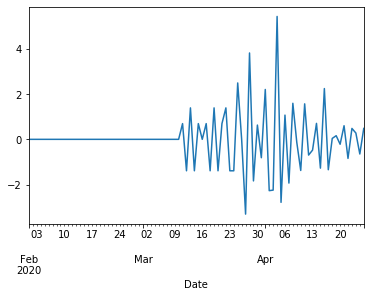

In [338]:
train_diff2.deaths.plot()

## 2) Modeling

In [339]:
model = VAR(train_diff2)

C:\Users\gdanish\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [340]:
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,2.653,2.746,14.19,2.690
1,0.4848,0.8585,1.624,0.6339
2,-0.6011,0.05271,0.5491,-0.3403
3,-1.352,-0.4180*,0.2600,-0.9795
4,-1.601,-0.3864,0.2040,-1.116
5,-1.761,-0.2660,0.1756,-1.164
6,-1.935,-0.1602,0.1496,-1.227
7,-2.118,-0.06282,0.1272,-1.298
8,-2.241,0.09384,0.1155,-1.310*
9,-2.350*,0.2649,0.1073*,-1.307


In [344]:
np.log(3)

1.0986122886681098

In [347]:
np.exp(1.0986122886681098)

3.0000000000000004

In [341]:
res = model.fit(4)
res.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 08, May, 2020
Time:                     08:36:36
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                  -0.838114
Nobs:                     82.0000    HQIC:                  -1.52321
Log likelihood:          -228.765    FPE:                   0.138805
AIC:                     -1.98277    Det(Omega_mle):       0.0892642
--------------------------------------------------------------------
Results for equation deaths
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.006819         0.063681            0.107           0.915
L1.deaths           -1.491085         0.124681          -11.959           0.000
L1.confirmed         0.040769         0.104804            0.389

## 3) Derby-Watson Test for Serial Correlation

In [264]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(res.resid)

In [265]:
# Values around 2 is ok
out

array([2.18080916, 2.09025911, 2.16497008])

In [24]:
lag_order = res.k_ar

In [25]:
lag_order

4

In [26]:
forecast_input = train_diff2.values[-lag_order:]
forecast_input

array([[ 0.07822199,  0.12654783,  0.09789715],
       [-0.07568877, -0.06233162,  0.59755565],
       [ 0.0413665 , -0.06507363, -1.1560526 ],
       [-0.48776755, -0.11923886,  0.62493768]])

In [27]:
pred = res.forecast(forecast_input, 20)

In [28]:
pred

array([[ 6.54885572e-01,  2.34242113e-01,  3.92749441e-02],
       [-2.78468356e-01, -3.98850502e-02, -1.14860908e-01],
       [-1.88748383e-01, -2.51539901e-01, -1.18963005e-01],
       [ 2.48317125e-01,  2.72666592e-01,  1.22789561e-01],
       [-8.34940994e-02, -1.11080376e-01,  7.39748320e-02],
       [-3.04974213e-02, -4.41108078e-03, -1.95181044e-01],
       [-3.15123640e-02, -2.49932235e-02,  1.19917389e-01],
       [ 8.35587968e-02,  3.97059826e-02, -1.43515315e-02],
       [-8.68303703e-02, -1.23239707e-02, -2.90113610e-02],
       [ 2.44441447e-02, -3.30019162e-02,  1.09613727e-02],
       [-1.17158609e-02,  2.24630198e-02, -1.31673070e-02],
       [ 4.84618673e-03, -1.39550469e-02,  1.76444089e-02],
       [-2.13777074e-02,  1.99967592e-04, -2.66945548e-02],
       [-6.46031337e-03, -1.09893597e-02,  1.30632181e-02],
       [ 1.11223320e-02,  3.72285107e-03, -8.90326232e-03],
       [-2.76163159e-02, -1.04095112e-02, -3.73417588e-03],
       [ 8.33193858e-03, -1.33758414e-03

In [29]:
len(pred)

20

In [30]:
train_diff2

,deaths,confirmed,recovered
Date,,,
2020-01-24,4.912655,2.788211,3.737670
2020-01-25,-1.386294,-0.523335,-1.791759
2020-01-26,-0.826679,-0.213578,2.159484
2020-01-27,0.752571,-0.159608,-1.834062
2020-01-28,0.014685,1.019052,1.999142
...,...,...,...
2020-04-22,-0.360064,-0.109088,-0.589990
2020-04-23,0.078222,0.126548,0.097897
2020-04-24,-0.075689,-0.062332,0.597556


In [32]:
import datetime

In [33]:
start_date = train_diff2.index[-1] + datetime.timedelta(1)

In [34]:
end_date = start_date + datetime.timedelta(10+10-1)

In [35]:
start_date = str(start_date)[:10]
end_date = str(end_date)[:10]

In [36]:
idx = pd.date_range(start=start_date, end=end_date)

In [37]:
idx

DatetimeIndex(['2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30',
               '2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
               '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08',
               '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12',
               '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16'],
              dtype='datetime64[ns]', freq='D')

In [38]:
pred_df = pd.DataFrame(pred, index=idx, columns=train_diff2.columns + '_2d')

In [39]:
pred_df

,deaths_2d,confirmed_2d,recovered_2d
2020-04-27,0.654886,0.234242,0.039275
2020-04-28,-0.278468,-0.039885,-0.114861
2020-04-29,-0.188748,-0.251540,-0.118963
2020-04-30,0.248317,0.272667,0.122790
2020-05-01,-0.083494,-0.111080,0.073975
2020-05-02,-0.030497,-0.004411,-0.195181
2020-05-03,-0.031512,-0.024993,0.119917
2020-05-04,0.083559,0.039706,-0.014352
2020-05-05,-0.086830,-0.012324,-0.029011
2020-05-06,0.024444,-0.033002,0.010961


In [40]:
def invert_transformation(df_forecast, second_diff=False, third_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = train.columns
    for col in columns:        
        # Roll back 3rd Diff
        if third_diff:
            df_fc[str(col)+'_2d'] = train_diff2[col].iloc[-1] + df_fc[str(col)+'_3d'].cumsum()
#             df_fc[str(col)+'_2d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) - (df_train[col].iloc[-2]-df_train[col].iloc[-3]) + df_fc[str(col)+'_3d'].cumsum()        
        # Roll back 2nd Diff
        elif second_diff:
            df_fc[str(col)+'_1d'] = train_diff1[col].iloc[-1] + df_fc[str(col)+'_2d'].cumsum()
#             df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        else:
            df_fc[str(col)+'_forecast'] = round(np.exp(train_log[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()))
    return df_fc

In [41]:
train_diff1

,deaths,confirmed,recovered
Date,,,
2020-01-23,-2.833213,-1.723848,-2.639057
2020-01-24,2.079442,1.064362,1.098612
2020-01-25,0.693147,0.541027,-0.693147
2020-01-26,-0.133531,0.327449,1.466337
2020-01-27,0.619039,0.167841,-0.367725
...,...,...,...
2020-04-22,-0.066904,-0.023050,-0.137629
2020-04-23,0.011318,0.103498,-0.039732
2020-04-24,-0.064371,0.041167,0.557824


In [42]:
pred_df

,deaths_2d,confirmed_2d,recovered_2d
2020-04-27,0.654886,0.234242,0.039275
2020-04-28,-0.278468,-0.039885,-0.114861
2020-04-29,-0.188748,-0.251540,-0.118963
2020-04-30,0.248317,0.272667,0.122790
2020-05-01,-0.083494,-0.111080,0.073975
2020-05-02,-0.030497,-0.004411,-0.195181
2020-05-03,-0.031512,-0.024993,0.119917
2020-05-04,0.083559,0.039706,-0.014352
2020-05-05,-0.086830,-0.012324,-0.029011
2020-05-06,0.024444,-0.033002,0.010961


In [43]:
# pred_df_inv2 = invert_transformation(pred_df, second_diff=False, third_diff=True)

In [44]:
pred_df_inv1 = invert_transformation(pred_df, second_diff=True, third_diff=False)

In [45]:
pred_df_inv = invert_transformation(pred_df_inv1, second_diff=False, third_diff=False)

In [46]:
pred_df_inv

,deaths_2d,confirmed_2d,recovered_2d,deaths_1d,confirmed_1d,recovered_1d,deaths_forecast,confirmed_forecast,recovered_forecast
2020-04-27,0.654886,0.234242,0.039275,0.144114,0.091096,0.065984,4289.0,80940.0,30520.0
2020-04-28,-0.278468,-0.039885,-0.114861,-0.134355,0.051211,-0.048877,3749.0,85194.0,29064.0
2020-04-29,-0.188748,-0.251540,-0.118963,-0.323103,-0.200329,-0.167840,2714.0,69728.0,24573.0
2020-04-30,0.248317,0.272667,0.122790,-0.074786,0.072338,-0.045050,2519.0,74958.0,23491.0
2020-05-01,-0.083494,-0.111080,0.073975,-0.158280,-0.038743,0.028924,2150.0,72110.0,24180.0
2020-05-02,-0.030497,-0.004411,-0.195181,-0.188777,-0.043154,-0.166257,1780.0,69064.0,20476.0
2020-05-03,-0.031512,-0.024993,0.119917,-0.220290,-0.068147,-0.046339,1428.0,64515.0,19549.0
2020-05-04,0.083559,0.039706,-0.014352,-0.136731,-0.028441,-0.060691,1246.0,62706.0,18398.0
2020-05-05,-0.086830,-0.012324,-0.029011,-0.223561,-0.040765,-0.089702,996.0,60201.0,16820.0
2020-05-06,0.024444,-0.033002,0.010961,-0.199117,-0.073767,-0.078741,816.0,55920.0,15546.0


In [49]:
df_forecast = pred_df_inv.iloc[:,-3:]
df_forecast.columns = df_world.columns

In [50]:
df_forecast

,deaths,confirmed,recovered
2020-04-27,4289.0,80940.0,30520.0
2020-04-28,3749.0,85194.0,29064.0
2020-04-29,2714.0,69728.0,24573.0
2020-04-30,2519.0,74958.0,23491.0
2020-05-01,2150.0,72110.0,24180.0
2020-05-02,1780.0,69064.0,20476.0
2020-05-03,1428.0,64515.0,19549.0
2020-05-04,1246.0,62706.0,18398.0
2020-05-05,996.0,60201.0,16820.0
2020-05-06,816.0,55920.0,15546.0


In [51]:
train

,deaths,confirmed,recovered
Date,,,
2020-01-22,17.0,555.0,28.0
2020-01-23,1.0,99.0,2.0
2020-01-24,8.0,287.0,6.0
2020-01-25,16.0,493.0,3.0
2020-01-26,14.0,684.0,13.0
...,...,...,...
2020-04-22,6677.0,75566.0,30139.0
2020-04-23,6753.0,83806.0,28965.0
2020-04-24,6332.0,87328.0,50598.0


In [52]:
def rmse(forecast, actual):
    return np.mean((forecast - actual)**2)**.5  # RMSE
def mape(forecast, actual):
    return np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE

In [53]:
test_f = test.join(df_forecast, rsuffix='_f')

In [54]:
rmse(test_f.deaths_f, test_f.deaths)

3520.319985455868

In [55]:
mape(test_f.deaths_f, test_f.deaths), mape(test_f.confirmed_f, test_f.confirmed), mape(test_f.recovered_f, test_f.recovered)

(0.588195235744578, 0.18732917731629453, 0.4247771576175487)

In [56]:
comb = pd.concat([train, df_forecast], axis = 0)

In [57]:
comb

,deaths,confirmed,recovered
2020-01-22,17.0,555.0,28.0
2020-01-23,1.0,99.0,2.0
2020-01-24,8.0,287.0,6.0
2020-01-25,16.0,493.0,3.0
2020-01-26,14.0,684.0,13.0
...,...,...,...
2020-05-12,211.0,37010.0,8948.0
2020-05-13,166.0,34026.0,8096.0
2020-05-14,128.0,31175.0,7286.0
2020-05-15,99.0,28385.0,6545.0


In [58]:
new_cases_forecast = pd.concat([train, df_forecast], axis = 0)
total_cases_forecast = new_cases_forecast.cumsum()

In [59]:
final_forecast = pd.concat([total_cases_forecast,new_cases_forecast], axis = 1)

In [60]:
[col + '_incr' for col in new_cases_forecast.columns]

['deaths_incr', 'confirmed_incr', 'recovered_incr']

In [61]:
new_cases_forecast.columns.tolist()

['deaths', 'confirmed', 'recovered']

In [62]:
final_forecast.columns = new_cases_forecast.columns.tolist() + [col + '_incr' for col in new_cases_forecast.columns]

## 4) Visualizing Forecast

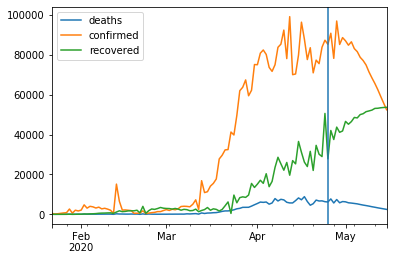

In [393]:
comb.plot()
plt.axvline(train.index[-1].date())

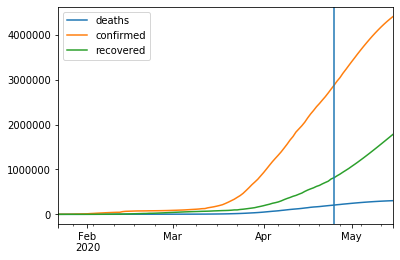

In [394]:
comb.cumsum().plot()
plt.axvline(train.index[-1].date())

In [188]:
import matplotlib.pyplot as plt

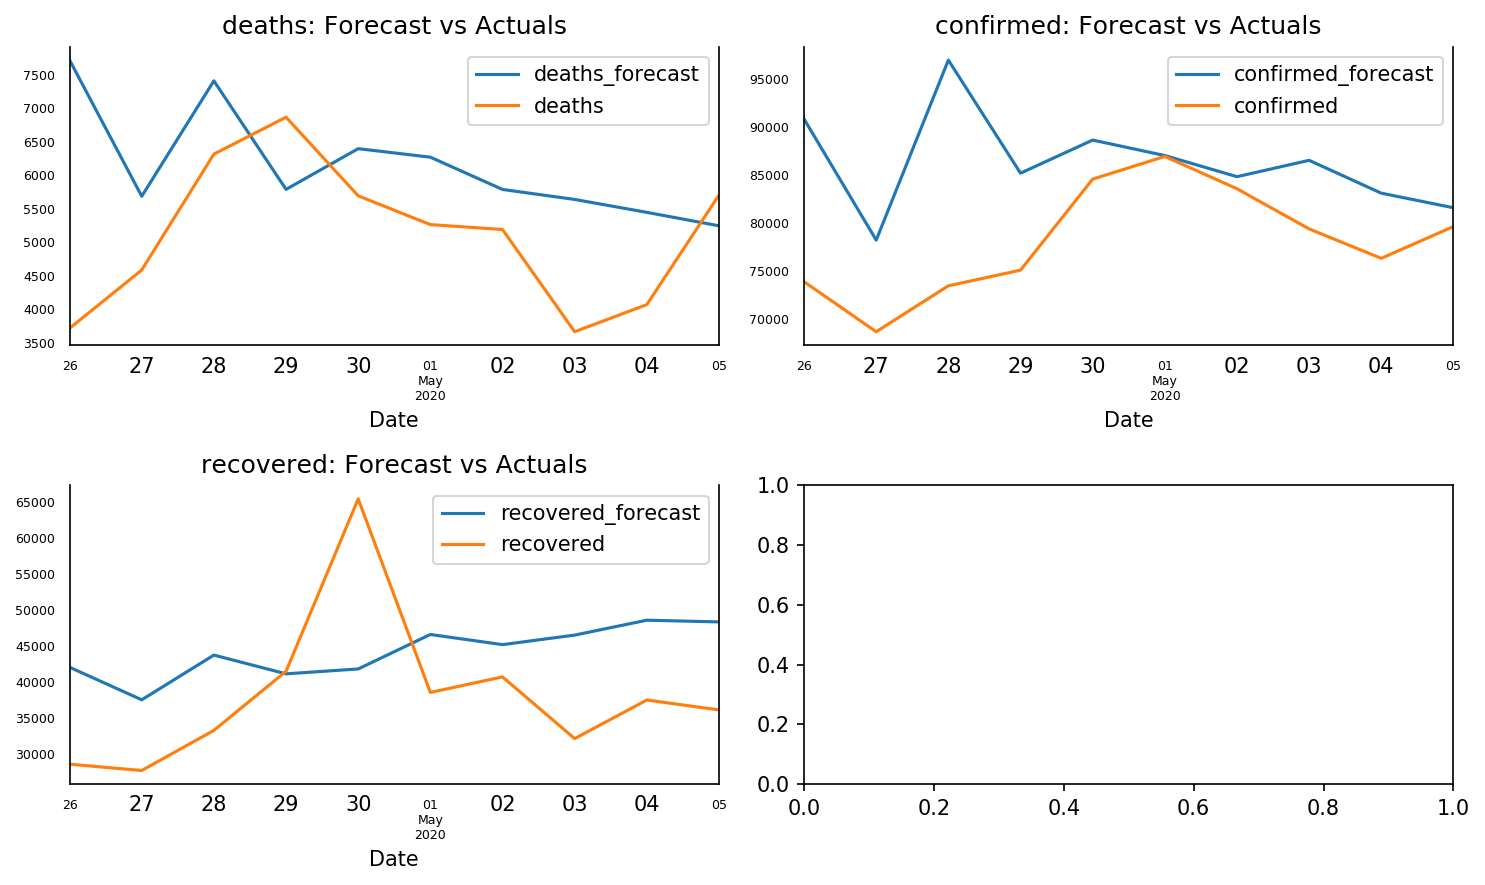

In [236]:
fig, axes = plt.subplots(nrows=int(len(train.columns)/2)+1, ncols=2, dpi=150, figsize=(10,6))
for i, (col,ax) in enumerate(zip(train.columns, axes.flatten())):
    pred_df_inv[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    test[col].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [163]:
train['deaths'], train_diff1['deaths']

(Date
 2020-01-22        17
 2020-01-23        18
 2020-01-24        26
 2020-01-25        42
 2020-01-26        56
                ...  
 2020-04-21    180237
 2020-04-22    186914
 2020-04-23    193667
 2020-04-24    199999
 2020-04-25    206187
 Name: deaths, Length: 95, dtype: int64,
 Date
 2020-01-23    0.057158
 2020-01-24    0.367725
 2020-01-25    0.479573
 2020-01-26    0.287682
 2020-01-27    0.381368
                 ...   
 2020-04-21    0.040415
 2020-04-22    0.036376
 2020-04-23    0.035492
 2020-04-24    0.032172
 2020-04-25    0.030471
 Name: deaths, Length: 94, dtype: float64)

In [159]:
pred_df.cumsum()

,deaths_3d,confirmed_3d,recovered_3d
Date,,,
2020-04-26,-0.018496,-0.016109,-0.012542
2020-04-27,0.002051,0.004498,0.000203
2020-04-28,-0.003431,0.002281,0.002476
2020-04-29,-0.004585,-0.004214,-0.003097
2020-04-30,-0.006832,-0.005497,-0.008505
2020-05-01,-0.001676,0.000105,-0.002888
2020-05-02,-0.001736,-0.000297,-0.002693
2020-05-03,-0.000306,0.001033,-0.001896
2020-05-04,-0.003941,-0.003338,-0.007341


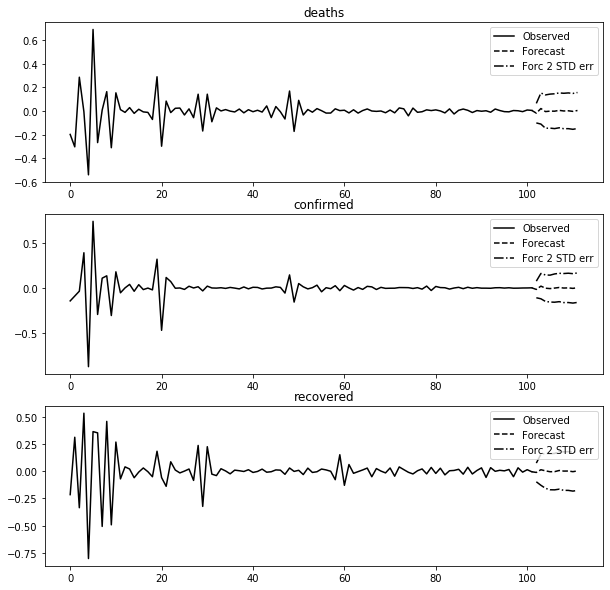

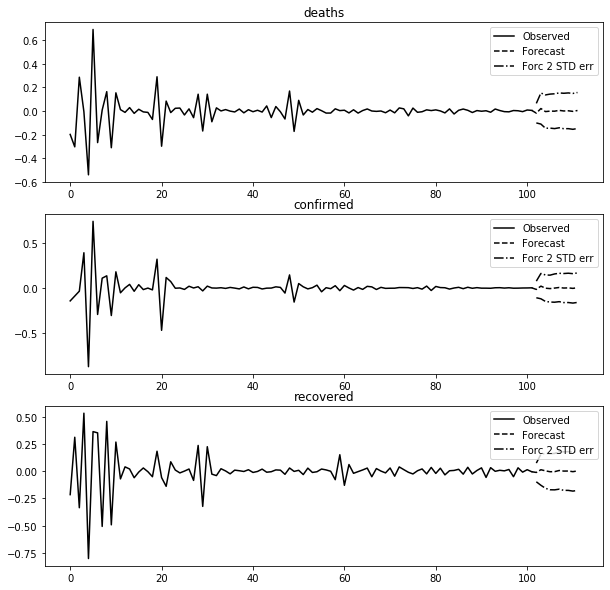

In [136]:
res.plot_forecast(10)

# Rough Work

In [73]:
import statsmodels.api as sm

In [74]:
mdata = sm.datasets.macrodata.load_pandas().data

In [77]:
dates = mdata[['year', 'quarter']].astype(int).astype(str)
quarterly = dates["year"] + "Q" + dates["quarter"]

In [78]:
from statsmodels.tsa.base.datetools import dates_from_str

In [80]:
quarterly = dates_from_str(quarterly)

In [82]:
mdata = mdata[['realgdp','realcons','realinv']]

In [85]:
mdata.index = pd.DatetimeIndex(quarterly)

In [96]:
type(mdata.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [97]:
type(df_world.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [98]:
df_world

,deaths,confirmed,recovered,deaths_incr,confirmed_incr,recovered_incr
Date,,,,,,
2020-01-22,17,555,28,0.0,0.0,0.0
2020-01-23,18,654,30,1.0,99.0,2.0
2020-01-24,26,941,36,8.0,287.0,6.0
2020-01-25,42,1434,39,16.0,493.0,3.0
2020-01-26,56,2118,52,14.0,684.0,13.0
...,...,...,...,...,...,...
2020-05-01,238619,3343777,1052415,5262.0,86924.0,38544.0
2020-05-02,243808,3427343,1093112,5189.0,83566.0,40697.0
2020-05-03,247470,3506729,1125236,3662.0,79386.0,32124.0


In [86]:
mdata

,realgdp,realcons,realinv
1959-03-31,2710.349,1707.4,286.898
1959-06-30,2778.801,1733.7,310.859
1959-09-30,2775.488,1751.8,289.226
1959-12-31,2785.204,1753.7,299.356
1960-03-31,2847.699,1770.5,331.722
...,...,...,...
2008-09-30,13324.600,9267.7,1990.693
2008-12-31,13141.920,9195.3,1857.661
2009-03-31,12925.410,9209.2,1558.494
2009-06-30,12901.504,9189.0,1456.678


In [90]:
data = np.log(mdata).diff().dropna()

In [92]:
data

,realgdp,realcons,realinv
1959-06-30,0.024942,0.015286,0.080213
1959-09-30,-0.001193,0.010386,-0.072131
1959-12-31,0.003495,0.001084,0.034425
1960-03-31,0.022190,0.009534,0.102664
1960-06-30,-0.004685,0.012572,-0.106694
...,...,...,...
2008-09-30,-0.006781,-0.008948,-0.017836
2008-12-31,-0.013805,-0.007843,-0.069165
2009-03-31,-0.016612,0.001511,-0.175598
2009-06-30,-0.001851,-0.002196,-0.067561


In [93]:
adfuller_test(data.realgdp)

(0.0, True)

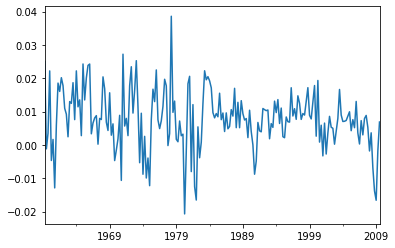

In [94]:
data.realgdp.plot()

In [95]:
model = VAR(data)
r = model.fit(2)
r.summary()

C:\Users\gdanish\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 06, May, 2020
Time:                     20:39:18
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.5830
Nobs:                     200.000    HQIC:                  -27.7892
Log likelihood:           1962.57    FPE:                7.42129e-13
AIC:                     -27.9293    Det(Omega_mle):     6.69358e-13
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.001527         0.001119            1.365           0.172
L1.realgdp         -0.279435         0.169663           -1.647           0.100
L1.realcons         0.675016         0.131285            5.142    

In [ ]:
df_filt = df[(df.ConfirmedCases != 0) & (df.Country_Region == country_name)]
df_filt = df_filt.groupby(['Date'], as_index = False).agg({forecasting_col:"sum"})
min_date = df_filt['Date'].min()
df_filt['Day'] = df_filt['Date'] - min_date
df_filt['Day'] = df_filt['Day'].dt.days
df_filt[forecasting_col] = np.log(df_filt[forecasting_col])